# 0. Tipo tabela de dados ou **data frame**

Um tipo muito útil que está disponível na biblioteca **pandas** é o tipo tabela de dados ou **data frame**. Com ele é possível manipular dados em formato de tabela e utilizar funções estatísticas variadas. É um tipo de dados mutável, com ordenação e indexação.

Além disso, a biblioteca **pandas** fornece uma série de funções que facilitam a leitura de dados de arquivos e páginas da internet o que permite a criação de uma série de aplicações importantes como será visto mais para frente.

Se você consegue entender o funcionamentos dos comandos que estão na próxima células, então, não é necessário prosseguir nesta seção.



In [ ]:
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns

df  = pd.DataFrame(data=[[7,20],[4,9]], index=[0,1], columns=['F','C'])
df2 = pd.DataFrame({'Favor': [15, 4], 'Contra': [45, 36]})
df2 = df2.rename(index={0: 2, 1: 3},columns={'Favor':'F','Contra':'C'})
print(df)
print(df.loc[0,'C'])
print(df2)
print(df2.iloc[0,0])
df = pd.concat([df, df2])
display(HTML(df.to_html()))
print(df[df > 4])

media     = df.loc[:,'F'].mean()
variancia = df.loc[:,'C'].var(ddof=0)
print(media)
print(variancia)

# Teste um dos comandos de cada vez:
df.loc[:4].style.background_gradient(cmap='viridis')
# df.style.bar(subset=['F'], align='mid', color=['#d65f5f', '#5fba7d'])
# boxplot = df.boxplot()

   F   C
0  7  20
1  4   9
20
    F   C
2  15  45
3   4  36
15


,F,C
0,7,20
1,4,9
2,15,45
3,4,36


      F   C
0   7.0  20
1   NaN   9
2  15.0  45
3   NaN  36
7.5
194.25


,F,C
0,7,20
1,4,9
2,15,45
3,4,36


# 1. Criando uma tabela de dados com listas

Um tipo **data frame** possui 3 elementos principais, que são inerentes a uma tabela, **índices das linhas** (**index**), **índices das colunas** (**columns**), e os **dados** (**data**). Cabe destacar que a atribuição inicias dos índices de linhas e colunas são listas de um tipo básico **int** ou **str**. Já para os dados é necessário criar uma lista de listas do tipo básico **int** ou **float** tal que **data = [lista1, lista2, ..., listan]**. A lista i de **data** corresponde aos dados da **i-ésima linha** da tabela de dados. Os dados deverão ter a seguinte organização geral:

* **index = lista_nomes_linhas**
* **columns = lista_nomes_colunas**
* **data = [lista1, lista2, ..., listan]**

In [ ]:
import pandas as pd

# Preenchendo os dados da tabela por linha.
# Index fornece a denominação por linha e columns a denominação por coluna.
ind=['H','M']
col=['F','C']
dat=[[7,20],[4,9]]
df = pd.DataFrame(data=dat, index=ind, columns=col)
df

,F,C
H,7,20
M,4,9


# 2. Criando uma tabela de dados com dicionários

o tipo **dataframe** pode ser criado também a partir dos valores contidos em uma coleção do tipo **dicionário**. Nesse caso, não se especifica os valores de **index**, **columns**, e **data**, pois as **chaves**  (**keys**) do dicionário irão fornecer as informações de **index** e os valores (**values**) do dicionário irão fornecer as informações de **data**. Observar que cada value será uma lista relacionada com os dados de cada linha da tabela. O dicionário deverá ter a seguinte forma geral:

**dicionario = {'L1': lista1, 'L2': lista2, ..., 'Ln': listan}**

In [ ]:
import pandas as pd
dic = {'Favor': [15, 4], 'Contra': [45, 36]}
df = pd.DataFrame(dic)
df

,Favor,Contra
0,15,45
1,4,36


# 3. Modificando a indexação de linhas e colunas

Caso seja necessário modificar a indexação de uma tabela de dados, basta empregar o comando **rename**. Neste caso, será necessário especificar se deseja-se modificar a indexação das linhas (**index**) ou colunas (**columns**). Independentemente da indexação será necessário empregar um dicionário cujas chaves indicam qual o índice atual e o valor associado indica para qual índice deseja-se trocar. De forma geral os novos índices serão fornecidos por dicionários com a seguinte formatação:

* **dic_linhas  = {'L1': 'NovaL1', 'L2': 'NovaL2', ..., 'LN' : 'NovaLN'}**
* **dic_colunas = {'C1': 'NovaC1', 'C2': 'NovaC2', ..., 'CN' : 'NovaCN'}**


In [ ]:
linhas  = {0: "H", 1: "M"}
colunas = {'Favor':'F','Contra':'C'}
df = df.rename(index=linhas,columns=colunas)
df

,F,C
H,15,45
M,4,36


# 4. Fazendo referência a um valor do tipo tabela de dados

São duas as formas para referenciar um valor contido na tabela:

1. **Por indexação**: Com o comando **loc** é necessário especificar a indexação do nome da linha e da coluna associadas ao elemento de interesse. Por exemplo: **df.loc['M','C']**
2. **Por ordenação**: Com o comando **iloc** é necessário especificar a ordem numérica das linhas e colunas. É útil saber que a indexação inicial de linhas e colunas começa no valor 0. Por exemplo: **df.iloc[0,0]**



In [ ]:
print("Obtendo elemento por indexação: " + str(df.loc['M','C']))
print("Obtendo elemento por ordenação: " + str(df.iloc[0,0]))


Obtendo elemento por indexação: 36
Obtendo elemento por ordenação: 15


# 5. Fazendo referência a múltiplos elementos

É possível fazer referência a todos os elementos de uma linha ou coluna tanto usando o comando **loc** ou **iloc** em conjunto com o operador **':'** para indicar todos os elementos da linha ou da coluna. A sintaxe geral é dada por:

* Usando **loc**: **df.loc[:,'C']** - obtém todos os elementos da **coluna com índice 'C'**;
* Usando **iloc**: **df.iloc[1,:]** - obtém todos os elementos da **linha com índice de ordem 1 (segunda linha)**;
* Usando **loc**: **df.loc[:,['F','C']]** - obtém todos os elementos das **colunas com índice 'F' e 'C'**;
* Usando **loc**: **df.loc['H':'M','F':'C']** - obtém todos os elementos das **linhas com índice 'H' e 'M' e colunas com índice 'F' e 'C'**;
* Usando **iloc**: **df.iloc[0:1,[0, 1]]** - obtém todos os elementos da **linha com índice de ordem 0 (primeira linha) e colunas com índice de ordem 0 e 1**.

In [ ]:
print("Dados da coluna C")
print(df.loc[:,'C'])
print("Dados linha de índice 1")
print(df.iloc[1,:])
print(df.loc[:,['F','C']])
print(df.loc['H':'M','F':'C'])
print(df.iloc[0:1,[0, 1]])

Dados da coluna C
H    45
M    36
Name: C, dtype: int64
Dados linha de índice 1
F     4
C    36
Name: M, dtype: int64
    F   C
H  15  45
M   4  36
    F   C
H  15  45
M   4  36
    F   C
H  15  45


# 6. Soma dos elementos por linha ou por coluna

É possível realizar a soma dos elementos por linha ou por coluna de uma tabela de dados. Para tanto, usa-se o comando **sum** e o parâmetro **axis** pode receber valor **1** para a **soma** de valores por **linha**, ou valor **2** para a **soma** de valores por **coluna**.

In [ ]:
print("Soma dos valores por linha")
print(df.sum(axis=1))
print("Soma dos valores por coluna")
print(df.sum(axis=0))


Soma dos valores por linha
H    60
M    40
dtype: int64
Soma dos valores por coluna
F    19
C    81
dtype: int64


# 7. Adicionando novas linhas ou colunas

A tabela de dados pode ter uma adição de linhas ou colunas. Para tanto, basta indicar se os novos valores serão colocados em uma **nova linha** com o comando **df.loc['NL1',:]** ou em uma **nova coluna** com o comando **df.loc[:,'NC1']**. O mesmo pode ser efetuado com o comando **iloc**.

In [ ]:
# Soma das linhas sendo guardada na nova coluna 'T'.
df.loc[:,'T'] = df.sum(axis=1)
# Soma das colunas sendo guardada na nova linha 'Total'.
df.loc['Total',:] = df.sum(axis=0)
df

,F,C,T
H,15.0,45.0,60.0
M,4.0,36.0,40.0
Total,19.0,81.0,100.0


# 8. Concatenação de duas tabelas de dados

Suponha que deseja-se adicionar uma série de dados como uma linha adicional no final de uma tabela com dados de 5 empresas. Os comando a seguir ilustram como realizar essa operação.

In [ ]:
# Dados históricos de 5 empresas no formato de dicionário: 
# {'Empresa1': lista_dados1,...}
dado_hist = {
    'Empresa 1': [4, 9, 6], 
    'Empresa 2': [9, 6, 4],
    'Empresa 3': [6, 4, 2],
    'Empresa 4': [4, 2, 4],
    'Empresa 5': [2, 4, 9]
}

# Salvando os dados do histórico de várias empresas na tabela de dados dfh
dfh = pd.DataFrame(dado_hist)
print("Dados da base de dados histórica")
print(dfh)

# Obtendo os dados de 1 dia de operação das 5 empresas como uma série.
dado_dia   = pd.Series([5, 15, 25, 35, 45],index = ['Empresa 1', 'Empresa 2', 'Empresa 3', 'Empresa 4', 'Empresa 5'])
# Transformando o dado de uma série em uma nova linha com índice 3.
nova_linha = pd.DataFrame([dado_dia],index=[3])
# Adicionando a nova linha na tabela com os dados do histórico das empresas.
dfh = pd.concat([dfh, nova_linha])
print("Dados da base de dados histórica atualizada")
print(dfh)

Dados da base de dados histórica
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0          4          9          6          4          2
1          9          6          4          2          4
2          6          4          2          4          9
Dados da base de dados histórica atualizada
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0          4          9          6          4          2
1          9          6          4          2          4
2          6          4          2          4          9
3          5         15         25         35         45


# 9. Adicionando novos dados e eliminando redundâncias

A tabela de dados pode adicionar novos dados contidos em outra tabela, bastando empregar o comando **append()**. Para saber as dimensões de uma tabela basta usar o comando **shape**. A eliminação de redundâncias pode ser feita com o comando **drop_duplicates**.


In [ ]:
dfh = dfh.append(dfh)
print(dfh.shape)
print(dfh)
dfh.drop_duplicates(inplace=True)
print(dfh.shape)
print(dfh)

(8, 5)
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0          4          9          6          4          2
1          9          6          4          2          4
2          6          4          2          4          9
3          5         15         25         35         45
0          4          9          6          4          2
1          9          6          4          2          4
2          6          4          2          4          9
3          5         15         25         35         45
(4, 5)
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0          4          9          6          4          2
1          9          6          4          2          4
2          6          4          2          4          9
3          5         15         25         35         45


#10. Filtragem de dados

É possível realizar a seleção e mesmo a alteração dos dados contidos na tabela de dados. Alguns exemplos:

* **dfh[dfh > 4]** - retorna todos os valores de dfh que são maiores que 4. Os demais valores serão mostrados como **'NaN'**;
* **dfh[dfh <= 4] = 0** - todos os valores de dfh que forem menores ou iguais que 4 serão trocados pelo valor 0.
* **dfh[dfh['Empresa 5'] > 5]** - retorna apenas as linhas tais que os valores contidos na coluna **'Empresa 5'** são maiores que 5;
* **dfh[dfh[0] <= 5]** - retorna apenas as colunas tais que os valores contidos na linha **'dfh[0]'** são menores ou iguais que 5;


In [ ]:
print(dfh)
print(dfh[dfh > 4])
print(dfh[dfh['Empresa 5'] > 5])
print(dfh[dfh['Empresa 1'] < 5])
dfh2 = dfh.copy()
dfh2[dfh2 <= 4] = 0
print(dfh2)

   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0          4          9          6          4          2
1          9          6          4          2          4
2          6          4          2          4          9
3          5         15         25         35         45
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0        NaN        9.0        6.0        NaN        NaN
1        9.0        6.0        NaN        NaN        NaN
2        6.0        NaN        NaN        NaN        9.0
3        5.0       15.0       25.0       35.0       45.0
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
2          6          4          2          4          9
3          5         15         25         35         45
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0          4          9          6          4          2
   Empresa 1  Empresa 2  Empresa 3  Empresa 4  Empresa 5
0          0          9          6          0          0
1          9          6        

# 11. Exibição da tabela de dados:  parte 1

Para exibir o conteúdo de uma tabela de dados de modo que a mesma tenha uma boa aparência, basta empregar os comandos **display**, **HTML** e **to_html** ao invés de apenas **print**. 

Também é possível mostrar apenas as **n** primeiras linhas de valores de **df** com **df.head(n)** ou **n** últimas linhas de valores de **df** com **df.tail(n)**.

In [ ]:
from IPython.display import display, HTML

display(HTML(dfh.to_html()))
dfha = dfh.head(2)
display(HTML(dfha.to_html()))
dfhb = dfh.tail(2)
display(HTML(dfhb.to_html()))


,Empresa 1,Empresa 2,Empresa 3,Empresa 4,Empresa 5
0,4,9,6,4,2
1,9,6,4,2,4
2,6,4,2,4,9
3,5,15,25,35,45


,Empresa 1,Empresa 2,Empresa 3,Empresa 4,Empresa 5
0,4,9,6,4,2
1,9,6,4,2,4


,Empresa 1,Empresa 2,Empresa 3,Empresa 4,Empresa 5
2,6,4,2,4,9
3,5,15,25,35,45


# 11. Exibição da tabela de dados:  parte 2

Mapas de cores podem ser utilizados para realçar as diferenças dos dados em uma tabela de dados. Mapa com apenas 1 cor pode ser usado como dado a seguir.

In [ ]:
# Mais detalhes em: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = dfh.style.background_gradient(cmap=cm)
s

,Empresa 1,Empresa 2,Empresa 3,Empresa 4,Empresa 5
0,4,9,6,4,2
1,9,6,4,2,4
2,6,4,2,4,9
3,5,15,25,35,45


# 11. Exibição da tabela de dados:  parte 3

Mapas de cores pré-estabelecidos pode ser utilizados na tabela. Alguns exemplos são: 'viridis', 'magma', e 'plasma'.

In [ ]:
# Uses the full color range
dfh.loc[:4].style.background_gradient(cmap='viridis')

,Empresa 1,Empresa 2,Empresa 3,Empresa 4,Empresa 5
0,4,9,6,4,2
1,9,6,4,2,4
2,6,4,2,4,9
3,5,15,25,35,45


# 11. Exibição da tabela de dados:  parte 4

Para obter os possíveis mapas de cores que podem ser aplicados na tabela de dados seguem os comandos que mostram os nomes desses possíveis mapas e suas respectivas cores.

In [ ]:
# https://plotly.com/python/builtin-colorscales/
import plotly.express as px

#print(px.colors.sequential.Plasma)
#a = px.colors.sequential.Plasma
a = px.colors.sequential.Rainbow
print(a)
fig = px.colors.sequential.swatches()
fig.show()

['rgb(150,0,90)', 'rgb(0,0,200)', 'rgb(0,25,255)', 'rgb(0,152,255)', 'rgb(44,255,150)', 'rgb(151,255,0)', 'rgb(255,234,0)', 'rgb(255,111,0)', 'rgb(255,0,0)']


# 11. Exibição da tabela de dados:  parte 5

É possível combinar apenas algumas colunas da tabela de dados com gráficos de barras com duas escalas de cores: uma cor para valores negativos e outra para valores positivos.

In [ ]:
dfh.loc[0,'Empresa 2'] = -9
dfh.loc[1,'Empresa 2'] = -6
dfh.loc[2,'Empresa 2'] = -4
dfh.style.bar(subset=['Empresa 1', 'Empresa 2'], align='mid', color=['#d65f5f', '#5fba7d'])

,Empresa 1,Empresa 2,Empresa 3,Empresa 4,Empresa 5
0,4,-9,6,4,2
1,9,-6,4,2,4
2,6,-4,2,4,9
3,5,15,25,35,45


# 12. Gráficos estatísticos

É possível criar diagramas de caixa ou **box-plot** a partir dos dados fornecidos. Os gráficos **box-plot** ordenam os dados em ordem crescente e fracionam os dados em quartis (faixas que contém $25\%$ dos dados):

* Primeiro quartil ou Q1: valor que delimita o limite superior da faixa de valores que contém os primeiro $25\%$ menores valores;
* Segundo quartil ou Q2: $50\%$ dos valores são menores e outros $50\%$ dos valores são maiores que a mediana Q2.
* Terceiro quartil ou Q3: faixa de valores que contém os terceiro $25\%$ menores valores. A faixa do terceiro quartil vai da mediana até Q3;
* Quarto quartil: faixa de valores que contém os quarto $25\%$ menores valores ou os primeiro maiores valores;

A Figura 1 fornece um exemplo de diagrama de caixa.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Elements_of_a_boxplot_pt.svg/400px-Elements_of_a_boxplot_pt.svg.png)

Figura 1: Exemplo de diagrama de caixa ou **box-plot**.

Observe que esse diagrama serve para representar a dispersão dos dados.Eventualmente valores discrepantes para mais ou para menos são chamados de **outliers** e são representados por bolinhas vermelhas na Figura 1. 

Esses gráficos podem ser gerados para tabelas de dados através do comando **boxplot**. Cadaa coluna da tabela é considerada como um conjunto de dados que será usado para construir um **box-plot**. Eventualmente, o parâmetro **column** ajuda a selecionar quais colunas deseja-se criar o **box-plot** correspondente.

Por último, caso deseje-se criar um **box-plot** para cada linha e não para cada coluna, deve-se, primeiro transpor linhas por colunas na tabela com o comando **transpose**.


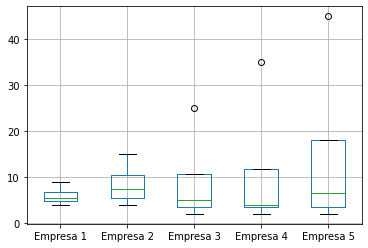

In [ ]:
import pandas as pd
boxplot = dfh.boxplot()

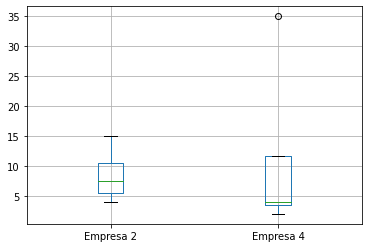

In [ ]:
boxplot = dfh.boxplot(column=['Empresa 2','Empresa 4'])

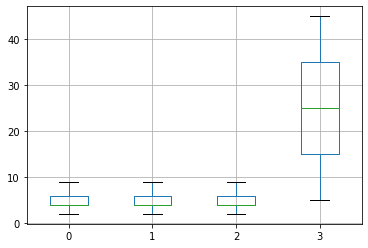

In [ ]:
dfh = dfh.transpose()
boxplot = dfh.boxplot()
dfh = dfh.transpose() # Voltando ao valor antes de aplicar transposta.

# 13. Medidas estatísticas

Medidas estatísticas podem ser obtidas. Seguem as medidas e seus respectivos comandos:

* Média: **mean**
* Variância: **var**
* Desvio-padrão: **std**
* Mediana: **median**
* Moda: **mode**
* Máximo: **max**
* Mínimo: **min**

In [ ]:
# Para pop. (divisão por N, 
# usa-se ddof = 0 -> N-0).
# Para amostral (divisão por N, 
# usa-se ddof = 1 -> N-1).
variancia = dfh.loc[:,'Empresa 1'].var(ddof=0)
desviop   = dfh.loc[:,'Empresa 1'].std(ddof=0)
media     = dfh.loc[:,'Empresa 1'].mean()
mediana   = dfh.loc[:,'Empresa 1'].median()
moda      = dfh.loc[:,'Empresa 1'].mode()
maximo    = dfh.loc[:,'Empresa 1'].max()
minimo    = dfh.loc[:,'Empresa 1'].min()
amplitude = maximo - minimo
print('------------------------------')
print('Estatísticas da Empresa 1')
print('------------------------------')
print('Media         = '+str(media))
print('Mediana       = '+str(mediana))
print('Moda          = '+str(moda))
print('Variancia     = '+str(variancia))
print('Desvio-padrão = '+str(desviop))
print('Máximo        = '+str(maximo))
print('Mínimo        = '+str(minimo))
print('Amplitude     = '+str(amplitude))
print('------------------------------')


------------------------------
Estatísticas da Empresa 1
------------------------------
Media         = 6.0
Mediana       = 5.5
Moda          = 0    4
1    5
2    6
3    9
dtype: int64
Variancia     = 3.5
Desvio-padrão = 1.8708286933869707
Máximo        = 9
Mínimo        = 4
Amplitude     = 5
------------------------------


# 14. Resumo desta seção

* Tabela de dados ou **data frame** é um tipo de dados mutável, com ordenação e com indexação. Seus principais elementos são **index** (para as linhas), **columns** (para as colunas) e **data** (para os dados) relacionados à organização dos dados em uma tabela.

* Uma tabela de dados pode ser criada a partir de listas 
ou de um dicionário:

> df  = pd.DataFrame(data=[[7,20],[4,9]], index=[0,1], columns=['F','C'])

> df2 = pd.DataFrame({'Favor': [15, 4], 'Contra': [45, 36]})

* Os comandos **loc** e **iloc** são importantes localização de dados
na tabela. O primeiro utiliza ordenação e o segundo usa indexação
dos dados:

> df.loc['M','C']

> df.iloc[0,0]


* Múltiplos elementos podem ser acessados a partir de **loc** e **iloc**:

> df.loc[:,['F','C']] 

> df.iloc[0:1,[0, 1]]

* Soma de valores por linhas: df.sum(axis=1) ou por colunas: df.sum(axis=0)

* Duas tabelas de dados podem ser concatenadas com o comando **concat**.
Exemplo: df = pd.concat([df,df2])

* O tamanho de uma tabela pode ser obtido com o comando **shape**: df.shape

* Dados duplicados podem ser eliminados com **drop_duplicates**:

> df.drop_duplicates(inplace=True)

* Parte dos dados podem ser selecionados com: 

> df[df > 4] 

> df[df['F'] > 4] 

* Uma tabela podem ser exibida como um html:

> display(HTML(df.to_html()))

* Algumas linhas da tabela (até o índice 3) podem ser exibidas como uma de cores
('viridis'):

> df.loc[:4].style.background_gradient(cmap='viridis') 

* Ou ainda conjugar desenhos de barras dentro da tabela:

> df.style.bar(subset=['F', 'C'], align='mid', color=['#d65f5f', '#5fba7d'])

* Um gráfico de box-plot pode ser gerado a partir dos dados da tabela:

> boxplot = df.boxplot()

* Medidas estatísticas podem ser extraídas dos dados contidos na tabela:

> variancia = df.loc[:,'F'].var(ddof=0)

> desviop   = df.loc[:,'C'].std(ddof=0)

> media     = df.loc[:,'F'].mean()